In [1]:


######### Recommendation Systems ########



In [2]:
##  Import Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:

## Get the Data

df1 = pd.read_csv('/Users/taherehehsan/u.data')
df1

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116
...,...
99997,880\t476\t3\t880175444
99998,716\t204\t5\t879795543
99999,276\t1090\t1\t874795795
100000,13\t225\t2\t882399156


In [10]:

column_names = ['user_id', 'item_id', 'rating', 'timestamp']

df = pd.read_csv('u.data', sep ='\t', names= column_names)

In [11]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [13]:

## Getting next Data

movie_titles = pd.read_csv('/Users/taherehehsan/Movie_Id_Titles.txt')

movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:

## we have user_id in commen so we can merge 2 dataset into 1 DataFrame

df = pd.merge(df, movie_titles, on= 'item_id')

df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [19]:

## we want to reach title, rating(mean; between 0-5), number of rating per movie.

# groupby titles based on mean of ratig

df.groupby('title')['rating'].mean().sort_values(ascending= False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [30]:

# groupby titles based on the number of ratings

df.groupby('title')['rating'].count().sort_values(ascending= False).head()


title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [31]:

## now ratings DF

ratings= pd.DataFrame(df.groupby('title')['rating'].mean())

ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [32]:

ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()


,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [33]:

## Sorting values of num of ratings

ratings.sort_values('num of ratings', ascending= False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


<Axes: xlabel='num of ratings', ylabel='Count'>

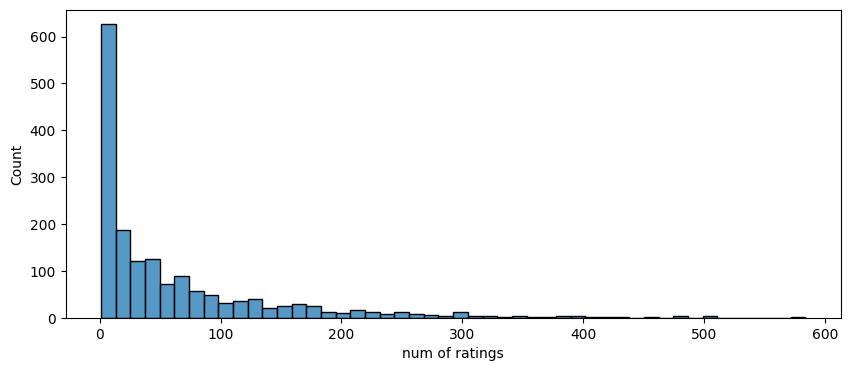

In [34]:


## Visualising the num of ratings


plt.figure(figsize=(10,4))

sns.histplot(data= ratings, x= 'num of ratings')

<Axes: xlabel='rating', ylabel='Count'>

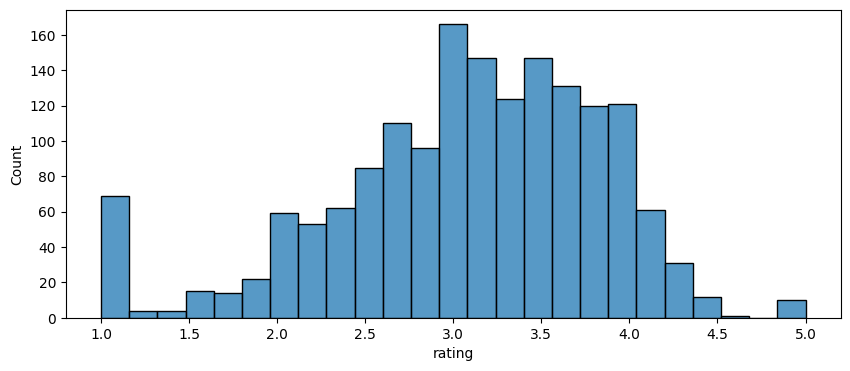

In [35]:

## Visualising the rating

plt.figure(figsize=(10,4))

sns.histplot(data= ratings, x= 'rating')

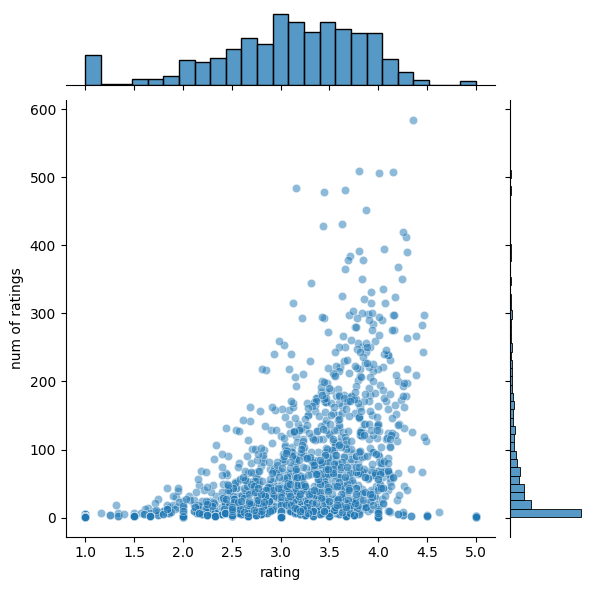

In [36]:

## Visualising both

sns.jointplot(x='rating', y= 'num of ratings', data= ratings, alpha= 0.5)

In [37]:

### using df bringing user_id and movies name in a DF in a .pivot_table()

moviemat = df.pivot_table(index= 'user_id', columns = 'title', values = 'rating')

moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:

# refer to 
ratings.sort_values('num of ratings', ascending= False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [39]:

## checking Star Wars (1977) rating 

starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [40]:

## what is the correlation between rating that user give to starwars and
## the ratings to the other movies

similar_to_starwars= moviemat.corrwith(starwars_user_ratings)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3057: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)

In [41]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [42]:

## Change this series to a DF

corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'] )

corr_starwars.dropna(inplace= True)

corr_starwars.head()


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [43]:

## Sorting corr_starwars

corr_starwars.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0


In [44]:

## some of the movies may rate only once! so it cannot be comparable with
## sth like star wars which is rated around 600 times.
# we have to add num of ratings with .join()

corr_starwars = corr_starwars.join(ratings['num of ratings'])

corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [45]:

## sort values of Correlations for movies rating more than 100 times

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head(10)


,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [46]:


###########################


##################


######### Recommender Systems with Python


## Import Libraries

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:

## Get the Data

df1 = pd.read_csv('/Users/taherehehsan/u.data')
df1

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116
...,...
99997,880\t476\t3\t880175444
99998,716\t204\t5\t879795543
99999,276\t1090\t1\t874795795
100000,13\t225\t2\t882399156


In [49]:

column_names = ['user_id', 'item_id', 'rating', 'timestamp']

df = pd.read_csv('u.data', sep= '\t',names= column_names )

In [50]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [52]:

## Now let's get the movie titles:

movie_titles = pd.read_csv('/Users/taherehehsan/Movie_Id_Titles.txt')

movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [53]:
## item_id is commen so merge them 
## “on = means merge these two tables together wherever item_id matches.”

df = pd.merge(df, movie_titles, on= 'item_id')

df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [54]:

######  EDA

## create a ratings dataframe with average rating and number of ratings

df.groupby('title')['rating'].mean().sort_values(ascending= False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [55]:

df.groupby('title')['rating'].count().sort_values(ascending = False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [57]:

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [58]:

ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()


,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: xlabel='num of ratings', ylabel='Count'>

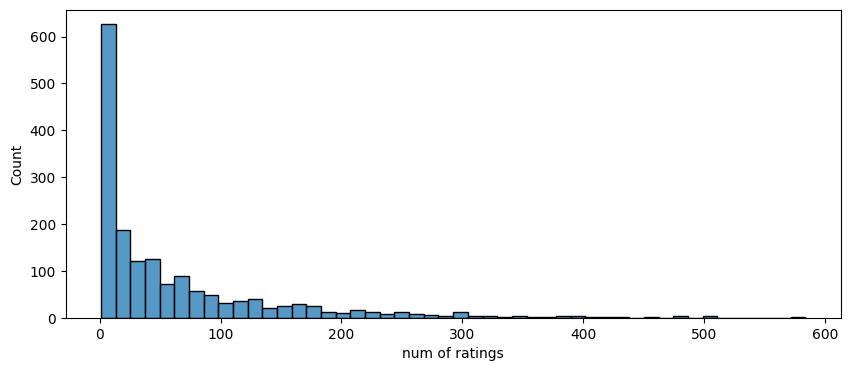

In [59]:

## Histogram

plt.figure(figsize=(10,4))

sns.histplot(data=ratings, x = 'num of ratings')


<Axes: xlabel='rating', ylabel='Count'>

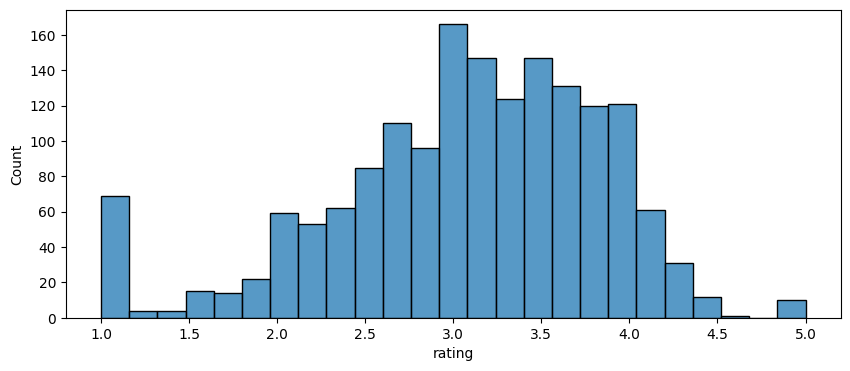

In [60]:

plt.figure(figsize=(10,4))

sns.histplot(data=ratings, x = 'rating')

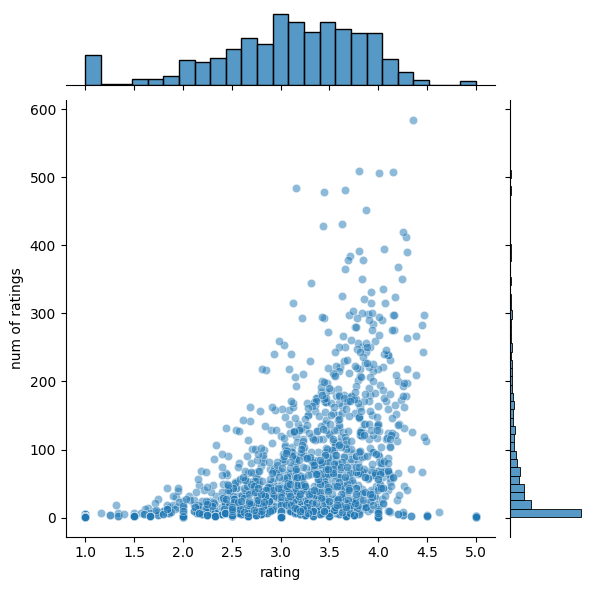

In [61]:

sns.jointplot(x='rating', y= 'num of ratings', data = ratings, alpha=0.5)

In [62]:

## Recommending Similar Movies

moviemat = df.pivot_table(index= 'user_id', columns= 'title', values = 'rating')

moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
## Most rated movie:

ratings.sort_values('num of ratings', ascending= False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [64]:

## Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [65]:

starwar_user_ratings = moviemat['Star Wars (1977)']
starwar_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [66]:

similar_to_starwars= moviemat.corrwith(starwars_user_ratings)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3057: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)

In [67]:
# clean this by removing NaN values and using a DataFrame instead of a series

corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

corr_starwars.dropna(inplace= True)

corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [68]:
corr_starwars.sort_values('Correlation', ascending= False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0


In [69]:
## filtering out movies that have less than 100 reviews 
## (this value was chosen based off the histogram from earlier).

corr_starwars = corr_starwars.join(ratings['num of ratings'])

corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [70]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending= False).head()


,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [86]:

### Now the same for the comedy Liar Liar:

liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [87]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3057: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]

In [88]:
corr_liarliar= pd.DataFrame(similar_to_liarliar, columns= ['Correlation'])

In [89]:
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


In [90]:
corr_liarliar.dropna(inplace= True)

In [91]:
corr_liarliar= corr_liarliar.join(ratings['num of ratings'])

In [92]:
corr_liarliar = corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending= False).head()

In [93]:
corr_liarliar.head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [27]:


###########################


################## extra-work-week19-Advanced Recommender Systems with Python


######### Advanced Recommender Systems with Python


## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [28]:
## Get the Data

df1 = pd.read_csv('/Users/taherehehsan/u.data')
df1

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116
...,...
99997,880\t476\t3\t880175444
99998,716\t204\t5\t879795543
99999,276\t1090\t1\t874795795
100000,13\t225\t2\t882399156


In [29]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

df = pd.read_csv('u.data', sep= '\t', names= column_names)

In [30]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [31]:

## 2nd Data

movie_titles =pd.read_csv('/Users/taherehehsan/Movie_Id_Titles.txt')

movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [32]:

## .merge()

df = pd.merge(df, movie_titles, on= 'item_id')

df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [33]:

n_users = df.user_id.unique()

n_items = df.user_id.unique()


In [34]:

print('Num. of Users: ' + str(n_users))

print('Num of Movies: '+ str(n_items))

Num. of Users: [  0 196 186  22 244 166 298 115 253 305   6  62 286 200 210 224 303 122
 194 291 234 119 167 299 308  95  38 102  63 160  50 301 225 290  97 157
 181 278 276   7  10 284 201 287 246 242 249  99 178 251  81 260  25  59
  72  87  42 292  20  13 138  60  57 223 189 243  92 241 254 293 127 222
 267  11   8 162 279 145  28 135  32  90 216 250 271 265 198 168 110  58
 237  94 128  44 264  41  82 262 174  43  84 269 259  85 213 121  49 155
  68 172  19 268   5  80  66  18  26 130 256   1  56  15 207 232  52 161
 148 125  83 272 151  54  16  91 294 229  36  70  14 295 233 214 192 100
 307 297 193 113 275 219 218 123 158 302  23 296  33 154  77 270 187 170
 101 184 112 133 215  69 104 240 144 191  61 142 177 203  21 197 134 180
 236 263 109  64 114 239 117  65 137 257 111 285  96 116  73 221 235 164
 281 182 129  45 131 230 126 231 280 288 152 217  79  75 245 282  78 118
 283 171 107 226 306 173 185 150 274 188  48 311 165 208   2 205 248  93
 159 146  29 156  37 141 195 108  47

In [35]:
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 944
Num of Movies: 1682


In [36]:

## Train Test Split

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)



In [37]:

###Create two user-item matrices, one for training and another for testing

train_data_matrix = np.zeros((n_users, n_items))

for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))

for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]



In [38]:

from sklearn.metrics.pairwise import pairwise_distances

user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')


In [39]:

def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        #You use np.newaxis so that mean_user_rating has same format as ratings
        
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [40]:

item_prediction = predict(train_data_matrix, item_similarity, type='item')

user_prediction = predict(train_data_matrix, user_similarity, type='user')


In [41]:

## Evaluation

from sklearn.metrics import mean_squared_error

from math import sqrt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [42]:

print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))

print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.12915767349857
Item-based CF RMSE: 3.4570185026548415


In [43]:


### Model-based Collaborative Filtering

sparsity=round(1.0-len(df)/float(n_users*n_items),3)

print('The sparsity level of MovieLens100K is ' +  str(sparsity*100) + '%')

The sparsity level of MovieLens100K is 93.7%


In [44]:

## Singular value decomposition (SVD).


import scipy.sparse as sp

from scipy.sparse.linalg import svds


In [45]:
## get SVD components from train matrix. Choose k.

u, s, vt = svds(train_data_matrix, k = 20)

s_diag_matrix=np.diag(s)

X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.7322718036343314
